In [1]:
#refrence 
#https://www.youtube.com/watch?v=luWCJ2pWmhM
#https://github.com/facebookresearch/detectron2
#https://drive.google.com/drive/folders/1GrFlJNaQ9eAKcFo9MdBa7lgC0xxl-PRw

In [2]:
 pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2
print(cv2.__version__)

4.9.0


In [5]:
import cv2
import matplotlib.pyplot as plt

In [6]:
config_file = r"C:\Users\SEERAM LAKSHMI SREYA\Downloads\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = r"C:\Users\SEERAM LAKSHMI SREYA\Downloads\frozen_inference_graph.pb"
#pre-trained object detection model

In [7]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)
#code initializes an object detection model

In [8]:
classLabel = []
file_name = r"C:\Users\SEERAM LAKSHMI SREYA\Downloads\labels.txt"
with open (file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [9]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [10]:
print(len(classLabels))

80


In [12]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127,5,127.5))
# model.setInputSwapRGB(True)
#prepare the input images for the object detection model, 
#ensuring they are correctly sized, scaled, mean-subtracted, and in the appropriate color format before being fed into the model for inference.

< cv2.dnn.Model 0000023E9F52A890>

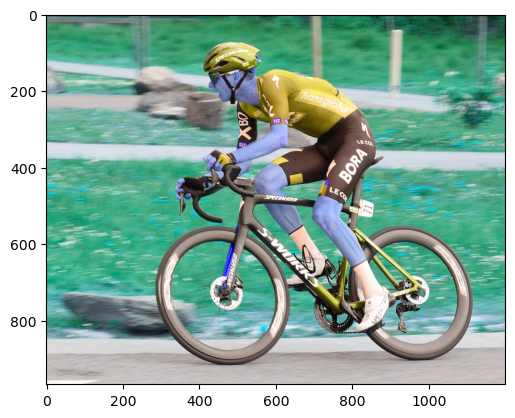

In [13]:
filee_name = r"C:\Users\SEERAM LAKSHMI SREYA\Downloads\man.jpg"
img = cv2.imread(filee_name)
plt.imshow(img)
plt.show()
#testing it on a random image from net

In [14]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold = 0.5)

In [15]:
print(ClassIndex)

[1 2]


In [16]:
# font_scale = 3
# font = cv2.FONT_HERSHEY_PLAIN
# for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
#     cv2.rectangle(img, boxes, (255, 0, 0), 2)
#     cv2.putText(img, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
# #it draws bounding boxes and labels around detected objects in an image.

In [25]:


# Assuming these are already defined:
# - img: The image on which to draw bounding boxes and labels
# - ClassIndex: Array of class indices for detected objects
# - confidence: Array of confidence scores for detected objects
# - bbox: Array of bounding box coordinates
# - classLabels: List or array of class labels

detected_labels = []  # List to store detected labels

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    # Draw bounding box
    cv2.rectangle(img, (boxes[0], boxes[1]), (boxes[2], boxes[3]), (255, 0, 0), 2)
    
    # Prepare text
    label = classLabels[ClassInd - 1]
    text = f"{label}: {conf:.2f}"
    
    # Draw label
    cv2.putText(img, text, (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
    
    detected_labels.append((label))
#     detected_labels.append((label, conf))
    
    print( "detected labels and confidence are:" ,detected_labels)
    
    # Print label to the console
#     print(f"Detected: {label} with confidence: {conf:.2f}")
#     print({label})

# Display the image (if you want to view it)
# cv2.imshow('Detected Objects', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
#

detected labels and confidence are: ['person']
detected labels and confidence are: ['person', 'bicycle']


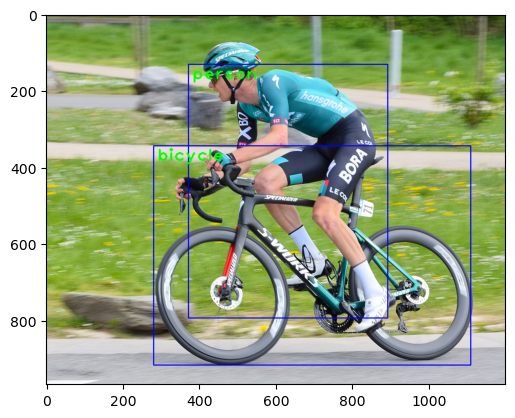

In [17]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
#helps in proper visualization

In [22]:
import cv2

file_name = r"C:\Users\SEERAM LAKSHMI SREYA\Downloads\streets.mp4"
cap = cv2.VideoCapture(file_name)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open video file or camera')


fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_file = r"C:\Users\SEERAM LAKSHMI SREYA\Downloads\outputstreets.avi" 
output_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
output_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter(output_file, fourcc, 20.0, (output_width, output_height))

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:  
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
    
    
    out.write(frame)


cap.release()
out.release()
print('Video saved successfully.')
#This code performs object detection on a video file or live camera feed using a pre-trained model.
#It annotates detected objects with bounding boxes and labels, then saves the annotated video as a new file. 
#The annotations include class labels fetched from classLabels, which are displayed alongside the bounding boxes. 
#Finally, it releases the video capture and writing resources, indicating the successful completion of the process.


Video saved successfully.


In [27]:
import cv2

file_name = r"C:\Users\SEERAM LAKSHMI SREYA\Downloads\streets.mp4"
cap = cv2.VideoCapture(file_name)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open video file or camera')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN


output_text_file = open(r"C:\Users\SEERAM LAKSHMI SREYA\Downloads\distances11.txt", "w")



while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
                
               
                observed_object_width = boxes[2] - boxes[0]  # Width of the bounding box
                distance = (known_object_width * focal_length) / observed_object_width
                output_text_file.write("Distance to object: {:.2f} meters\n".format(distance))


cap.release()
output_text_file.close()  
print('Distances saved successfully.')

#It initializes a text file to save the calculated distances.
#In a loop, it reads frames from the video feed.
#For each frame, it performs object detection using the model.detect() function.
#If objects are detected, it iterates through the detected objects, draws bounding boxes and labels on the frame, and calculates the distance to each object based on its size in the image.
#It writes the calculated distances to the text file.

Distances saved successfully.
